<html>
 <head>
 </head>
 <body>
          <div class="alert alert-block alert-info" style="color:darkgreen;font-size:25px;text-align:center">
         <b>Data visualisation with interactive chart using plotly library</b>
     </div>
                    <p style="text-align:center"> Python 3.9</p>
               <p style="text-align:center"> February 2023 </p>
     <br/>
     <a id='content'></a>
     <p style="color:blue"> <b>Contents:</b> </p>
     <a href="#1."> 1. Libraries</a><br/>
     <a href="#2."> 2. Data and chart: Species 1</a><br/>
     <a href="#3."> 3. Data and chart: species 2</a><br/>
     <a href="#4."> 4. Interactive chart: species 1 and 2</a><br/>
     <a href="#5."> 5. Publish interactive chart at Datapane.com</a><br/>
     <br/>
 </body>
</html>

<html>
 <head>
 </head>
 <body>
     <p style="color:red"> <b>NOTE</b></p>
     <p> &emsp; &#x2022; <u>Hyperlink features</u> for table of content in Github <u>does not work</u> the same way in Jupyter Notebook. <b>Just scroll down !</b></p>
     <p> </p>
     <br/>
 </body>
</html>

<html>
 <head>
 </head>
 <body>
     <p>&emsp; &#x2022;  the interactive chart is available here at <a href="https://cloud.datapane.com/reports/E7o5E2A/interactive-chart-tree-physiology/"  target="_blank">Datapane.com</a></p>
     <p>&emsp; &#x2022; this is the interactive version of chart (Figure 8) from my published paper <a href="https://doi.org/10.1016/j.agrformet.2023.109338"  target="_blank">Ismail et al. (2023)</a></p>
     <br/>
 </body>
</html>

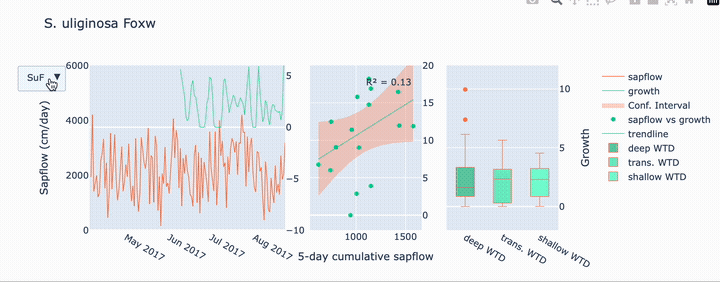

<html>
 <head>
 </head>
 <body>
          <a id='1.'></a>
     <p style="color:blue;font-size:20px"> 1. Libraries</p>
     <br/>
 </body>
</html>

In [1]:
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
from scipy import stats
import numpy as np

In [96]:
import datapane as dp

In [3]:
WD = '/your_path'

<html>
 <head>
 </head>
 <body>
          <a id='2.'></a>
     <p style="color:blue;font-size:20px"> 2. Data and chart: Species 1, C. arborescens</p>
     <br/>
     <p>Interactive chart has a dropdown menu that represent 2 different species (C. arborescens and S. uliginosa Foxw)</p>
     <p>&emsp;- for each species, there are 3 graphs (lef, middle, and right), and for each graph, there are 2-3 components</p>
     <br/>
 </body>
</html>

<html>
 <head>
 </head>
 <body>
     <br/>
     <p  style="color:blue">2.a Left chart: time-series sapflow and dendormeter</p>
     <br/>
 </body>
</html>

In [5]:
data_Gg.head()

,Date,Gg_sp,Gg_dd
0,2017-04-05,NaN,NaN
1,2017-04-06,2158.347746,NaN
2,2017-04-07,4923.799281,NaN
3,2017-04-08,1695.435242,NaN
4,2017-04-09,1966.255369,NaN


<html>
 <head>
 </head>
 <body>
     <br/>
     <p> &emsp; &#x2022; Making 2 figure components for left chart</p>
     <br/>
 </body>
</html>

In [6]:
fig_Gg_sp =  go.Scatter(
        x=data_Gg['Date'], y=data_Gg['Gg_sp'],
        line=dict(width=1, 
                    color='#FF7F50'),
        name='sapflow'
) 

fig_Gg_dd =  go.Scatter(
        x=data_Gg['Date'], y=data_Gg['Gg_dd'],
        line=dict(width=0.7, 
                    color='#00CC96'),
        name='growth'
) 

In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(fig_Gg_sp, secondary_y=False)

fig.add_trace(fig_Gg_dd, secondary_y=True)

fig.update_layout(
    title="Tree physiology",
    xaxis_title="Time",
    yaxis_title="Sapflow",
    autosize=False,
    width=800,
    height=400,
    yaxis2=dict(range=[-10,6]),
    xaxis_range=[data_Gg['Date'][0],data_Gg['Date'][140]]
)


fig.show()

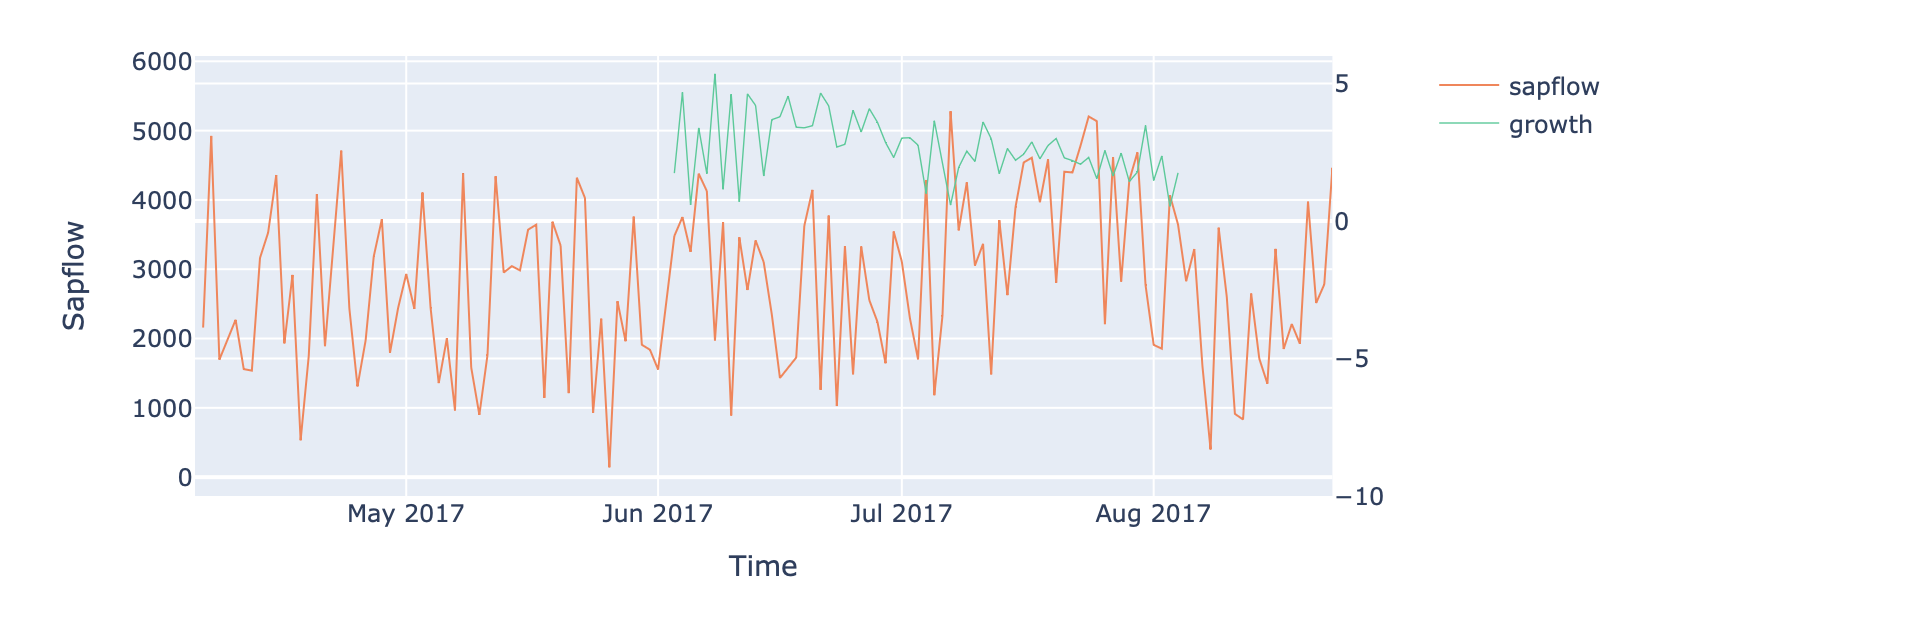

<html>
 <head>
 </head>
 <body>
     <br/>
     <p  style="color:blue">2.b middle chart: scatter plot of sapflow versus growth</p>
     <p  style="color:red">&emsp; </p>
     <br/>
 </body>
</html>

In [8]:
data_5d = pd.read_csv(WD+'processed_data/SRI_5day.csv')
data_5d.head()

,Unnamed: 0,gro,Js,species
0,1,13.868798,1898.935099,Ca
1,2,14.675788,1270.129865,Ca
2,3,17.853503,1187.111959,Ca
3,4,19.101911,1453.252566,Ca
4,5,16.824841,1172.468255,Ca


<html>
 <head>
 </head>
 <body>
     <br/>
     <p> &emsp; &#x2022; Making the 1st figure component for mid chart</p>
     <br/>
 </body>
</html>

In [72]:
fig_Gg_5d =  go.Scatter(
        x=data_5d.loc[data_5d['species']=='Ca', 'Js'], 
        y=data_5d.loc[data_5d['species']=='Ca', 'gro'],
        mode = 'markers',
        marker=dict(color='#00CC96'),
        name='sapflow vs growth'
)

<html>
 <head>
 </head>
 <body>
     <br/>
     <p> &emsp; &#x2022; Making the 2nd and 3rd figure components (trendline and predictive interval) for mid chart</p>
               <p> &emsp; &#x2022; use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html"  target="_blank">scipy</a>  to get the parameters</p>
     <br/>
 </body>
</html>

In [93]:
fig_Gg_td =  go.Scatter(
        x=Gg_tl[0][:,0].tolist(), 
        y=Gg_tl[0][:,1].tolist(),
    mode='lines',
        line=dict(width=0.7, 
                    color='#00CC96'),
        name='trendline'
)

fig_Gg_ci =  go.Scatter(
        x=Gg_ci[0][:,0].tolist(), 
        y=Gg_ci[0][:,1].tolist(),
        fill="toself",
        line=dict(width=0.0),
        opacity=0.3,
        name='Conf. Interval',
    fillcolor='#FF7F50'
)

In [ ]:
fig = make_subplots()

fig.add_trace(fig_Gg_5d)

fig.add_trace(fig_Gg_td)

fig.add_trace(fig_Gg_ci)

fig.add_annotation(xref="paper", yref="paper",
                   x=0.9, y=0.9,
            text="R\N{SUPERSCRIPT TWO} = " + str(Gg_r),
            showarrow=False
            )

fig.update_layout(
    title="Tree physiology",
    xaxis_title="5-day cumulative sapflow",
    yaxis_title="5-day cumulative growth",
    autosize=False,
    width=400,
    height=400
)


fig.show()

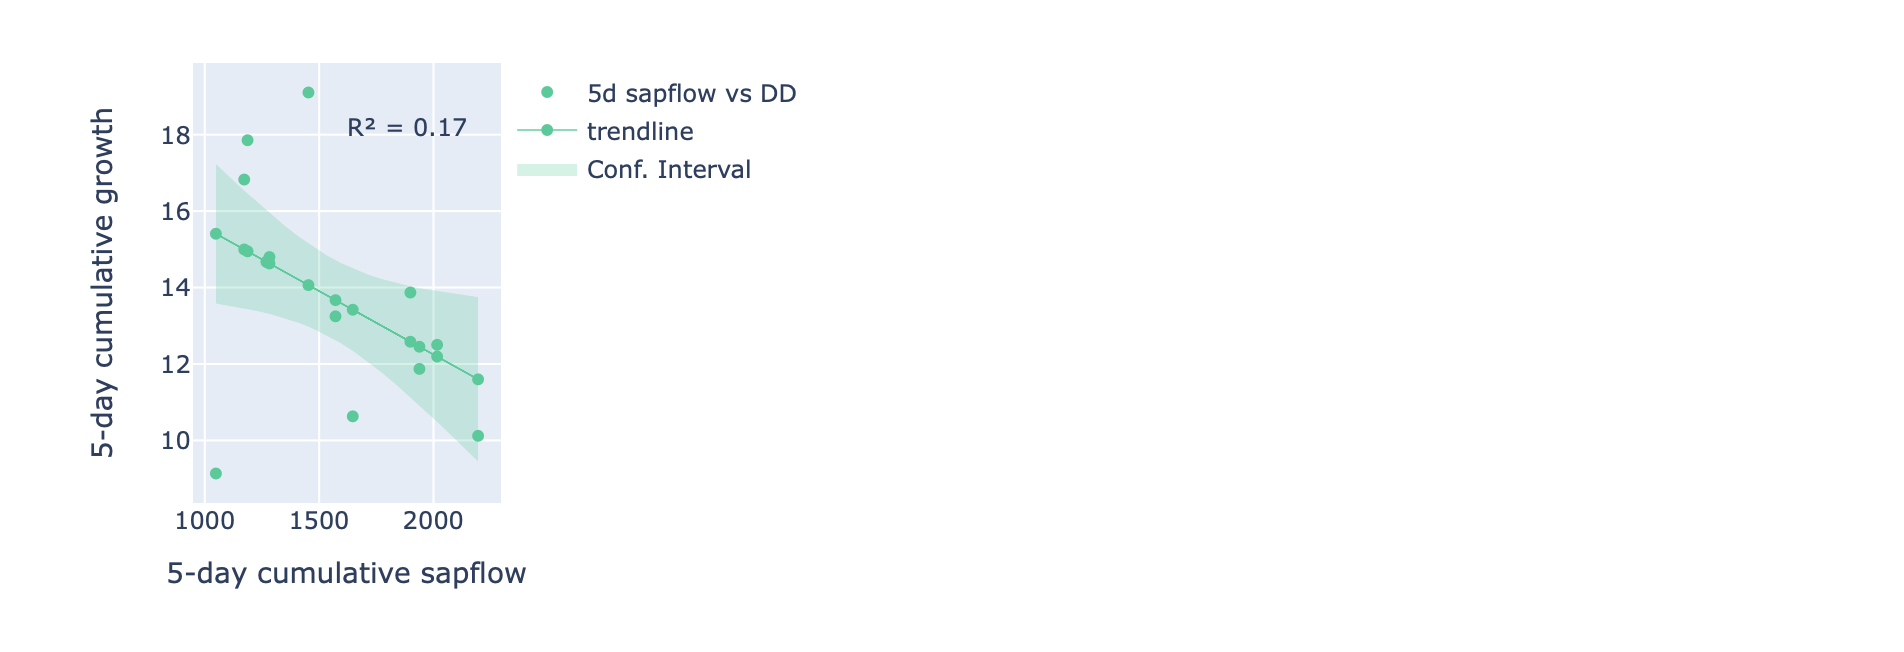

<html>
 <head>
 </head>
 <body>
     <br/>
     <p  style="color:blue">2.c right chart: Boxplot of Growth versus WTD (watertable depth)</p>
     <br/>
 </body>
</html>

In [13]:
WTD.head()

,date_hour,water_level,rainfall,Date,class
0,2017-05-01 19:27:00,-0.883824,13.5,2017-05-01,S
1,2017-05-02 21:29:00,-0.878375,0.0,2017-05-02,S
2,2017-05-03 21:22:00,-0.909250,2.7,2017-05-03,S
3,2017-05-04 19:40:00,-0.964242,0.0,2017-05-04,S
4,2017-05-05 18:26:00,-0.990500,0.0,2017-05-05,S


In [ ]:
fig_Gg_d = go.Box(y=WTD_Gg.loc[WTD_Gg['class'] == 'D', 'Gg_dd'], 
                  fillcolor='#66CDAA', marker_color='#FF7F50',
                  line=dict(width=0.7),
                 name='deep WTD')
fig_Gg_t = go.Box(y=WTD_Gg.loc[WTD_Gg['class'] == 'T', 'Gg_dd'], 
                  fillcolor='#76EEC6', marker_color='#FF7F50',
                  line=dict(width=0.7),
                 name='trans. WTD')
fig_Gg_s = go.Box(y=WTD_Gg.loc[WTD_Gg['class'] == 'S', 'Gg_dd'], 
                  fillcolor='#7FFFD4', marker_color='#FF7F50',
                  line=dict(width=0.7),
                 name='shallow WTD')

fig = go.Figure()
fig.add_trace(fig_Gg_d)
fig.add_trace(fig_Gg_t)
fig.add_trace(fig_Gg_s)

fig.update_layout(
    yaxis_title="growth",
    autosize=False,
    width=400,
    height=400
)

fig.show()

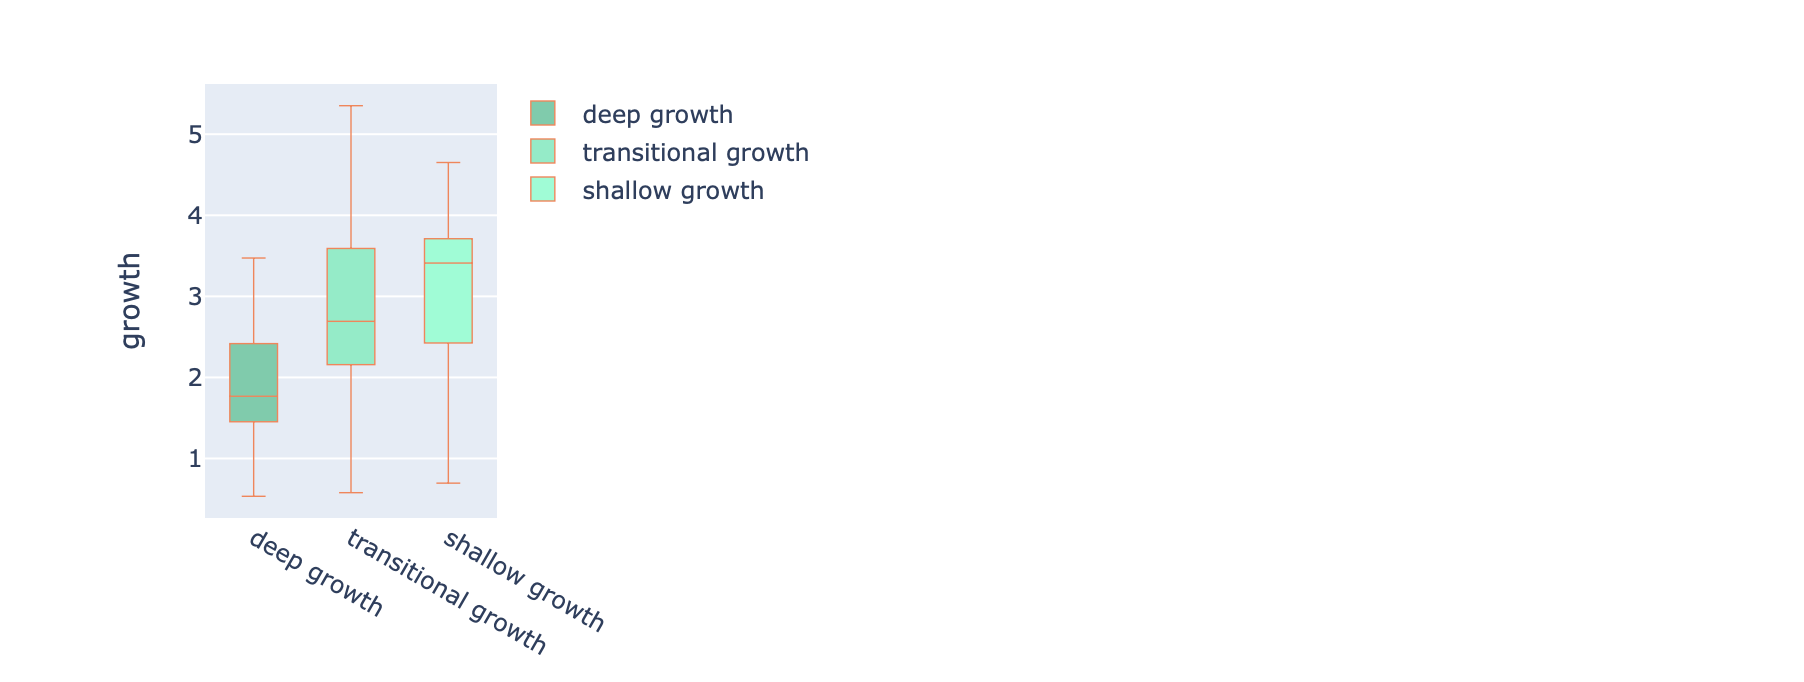

<html>
 <head>
 </head>
 <body>
     <br/>
     <p  style="color:blue">2.d combine 3 graphs into 1 chart</p>
     <br/>
 </body>
</html>

In [ ]:
fig = make_subplots(rows=1, cols=3, 
                    column_widths=[0.7, 0.4, 0.4],
                      specs=[[{"secondary_y": True}, {"secondary_y": None}, {"secondary_y": None}]],
                   horizontal_spacing = 0.05)

fig.add_trace(fig_Gg_sp, secondary_y=False,
             row = 1, col = 1)

fig.add_trace(fig_Gg_dd, secondary_y=True,
             row = 1, col = 1)

fig.add_trace(fig_Gg_5d,
             row = 1, col = 2)

fig.add_trace(fig_Gg_td,
             row = 1, col = 2)

fig.add_trace(fig_Gg_ci,
             row = 1, col = 2)

fig.add_annotation(xref='x2', yref='y2',
                   x=1900, y=19,
            text="R\N{SUPERSCRIPT TWO} = " + str(Gg_r),
            showarrow=False,
            row = 1, col = 2)

fig.add_trace(fig_Gg_d,
             row = 1, col = 3)
fig.add_trace(fig_Gg_t,
             row = 1, col = 3)
fig.add_trace(fig_Gg_s,
             row = 1, col = 3)

fig.update_layout(
    title="Tree physiology",
    xaxis_title="Time",
    xaxis2_title="5-day cumulative sapflow",
    yaxis_title="Sapflow (cm/day)",
    autosize=False,
    width=950,
    height=400,
    yaxis2=dict(range=[-10,6]),
    xaxis_range=[data_Gg['Date'][0],data_Gg['Date'][140]]
)

fig.show()

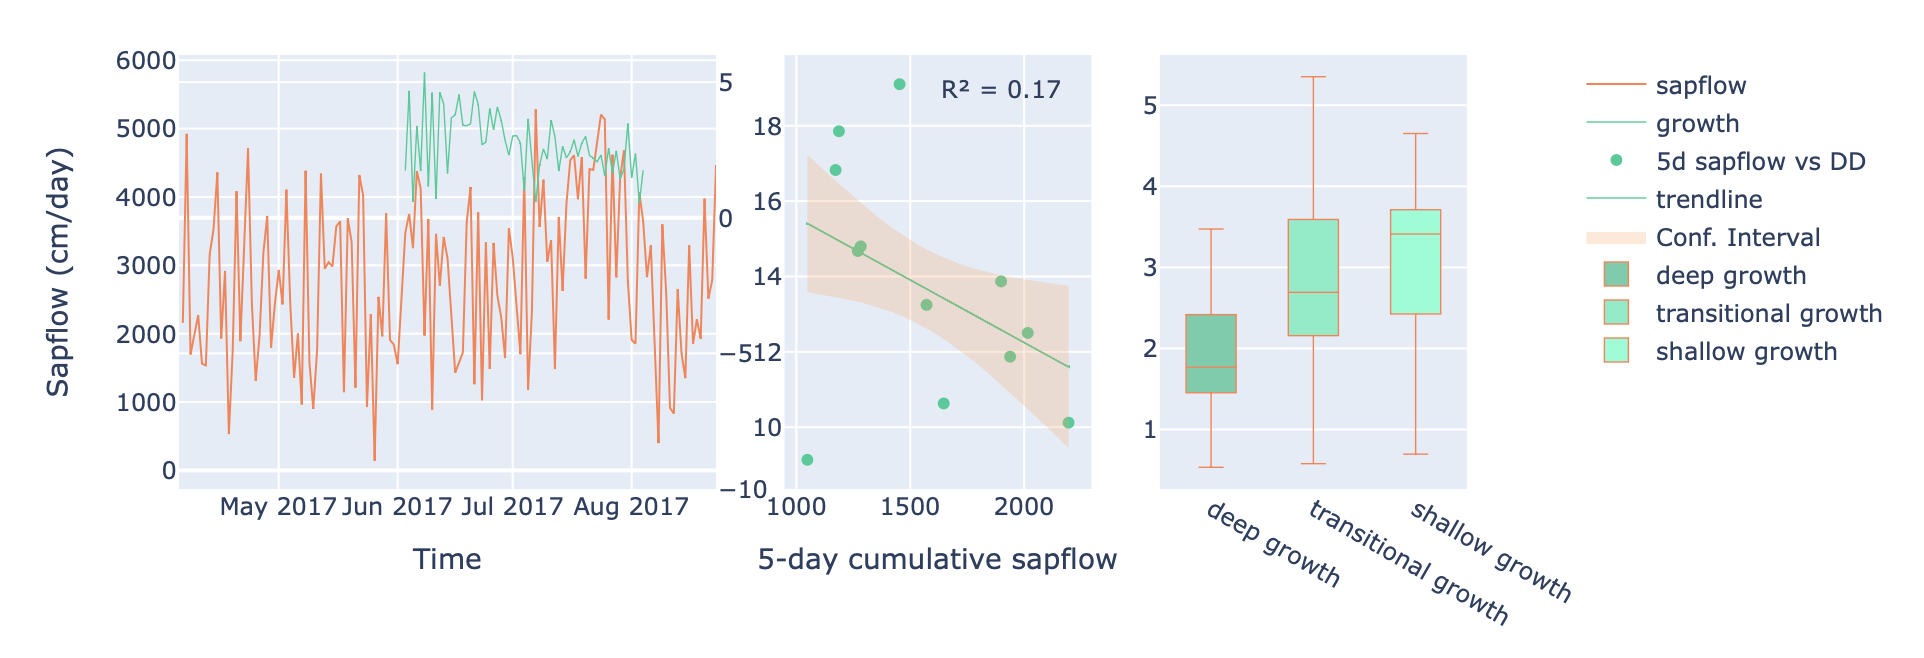

<html>
 <head>
 </head>
 <body>
          <a id='3.'></a>
     <p style="color:blue;font-size:20px"> 3. Data and chart: Species 2</p>
     <br/>
 </body>
</html>

In [17]:
data_MB.head()

,Date,MB_sp,MB_dd
0,2017-04-05,NaN,NaN
1,2017-04-06,1927.352690,NaN
2,2017-04-07,4204.985309,NaN
3,2017-04-08,1415.712025,NaN
4,2017-04-09,1758.891680,NaN


In [18]:
WTD_MB.head()

,Date,water_level,class,MB_dd
0,2017-05-01,-0.883824,S,NaN
1,2017-05-02,-0.878375,S,NaN
2,2017-05-03,-0.909250,S,NaN
3,2017-05-04,-0.964242,S,NaN
4,2017-05-05,-0.990500,S,NaN


In [90]:
fig_MB_sp =  go.Scatter(
        x=data_MB['Date'], y=data_MB['MB_sp'],
        line=dict(width=1, 
                    color='#FF7F50'),
        name='sapflow'
) 

fig_MB_dd =  go.Scatter(
        x=data_MB['Date'], y=data_MB['MB_dd'],
        line=dict(width=0.7, 
                    color='#00CC96'),
        name='growth'
)


MB_tl, MB_r, MB_ci= smy_OLS(data_5d.loc[data_5d['species']=='SuF', 'Js'],
        data_5d.loc[data_5d['species']=='SuF', 'gro'])

fig_MB_5d =  go.Scatter(
        x=data_5d.loc[data_5d['species']=='SuF', 'Js'], 
        y=data_5d.loc[data_5d['species']=='SuF', 'gro'],
        mode = 'markers',
        marker=dict(color='#00CC96'),
        name='sapflow vs growth'
)

fig_MB_td =  go.Scatter(
        x=MB_tl[0][:,0].tolist(), 
        y=MB_tl[0][:,1].tolist(),
    mode='lines',
        line=dict(width=0.7, 
                    color='#00CC96'),
        name='trendline'
)

fig_MB_ci =  go.Scatter(
        x=MB_ci[0][:,0].tolist(), 
        y=MB_ci[0][:,1].tolist(),
        fill="toself",
        line=dict(width=0.0),
        opacity=0.3,
        name='Conf. Interval',
    fillcolor='#FF7F50'
)


fig_MB_d = go.Box(y=WTD_MB.loc[WTD_MB['class'] == 'D', 'MB_dd'], 
                  fillcolor='#66CDAA', marker_color='#FF7F50',
                  line=dict(width=0.7),
                 name='deep WTD')
fig_MB_t = go.Box(y=WTD_MB.loc[WTD_MB['class'] == 'T', 'MB_dd'], 
                  fillcolor='#76EEC6', marker_color='#FF7F50',
                  line=dict(width=0.7),
                 name='trans. WTD')
fig_MB_s = go.Box(y=WTD_MB.loc[WTD_MB['class'] == 'S', 'MB_dd'], 
                  fillcolor='#7FFFD4', marker_color='#FF7F50',
                  line=dict(width=0.7),
                 name='shallow WTD')

In [ ]:
fig = make_subplots(rows=1, cols=3, 
                    column_widths=[0.7, 0.4, 0.4],
                      specs=[[{"secondary_y": True}, {"secondary_y": None}, {"secondary_y": None}]],
                   horizontal_spacing = 0.05)

fig.add_trace(fig_MB_sp, secondary_y=False,
             row = 1, col = 1)

fig.add_trace(fig_MB_dd, secondary_y=True,
             row = 1, col = 1)

fig.add_trace(fig_MB_5d,
             row = 1, col = 2)

fig.add_trace(fig_MB_td,
             row = 1, col = 2)

fig.add_trace(fig_MB_ci,
             row = 1, col = 2)

fig.add_annotation(xref='x2', yref='y2',
                   x=1500, y=20,
            text="R\N{SUPERSCRIPT TWO} = " + str(MB_r),
            showarrow=False,
            row = 1, col = 2)

fig.add_trace(fig_MB_d,
             row = 1, col = 3)
fig.add_trace(fig_MB_t,
             row = 1, col = 3)
fig.add_trace(fig_MB_s,
             row = 1, col = 3)

fig.update_layout(
    title="S. uliginosa Foxw",
    xaxis_title="Time",
    xaxis2_title="5-day cumulative sapflow",
    yaxis_title="Sapflow (cm/day)",
    autosize=False,
    width=950,
    height=400,
    yaxis2=dict(range=[-10,6]),
    xaxis_range=[data_Gg['Date'][0],data_Gg['Date'][140]]
)

fig.show()

<html>
 <head>
 </head>
 <body>
          <a id='4.'></a>
     <p style="color:blue;font-size:20px"> 4. Interactive chart: combine species 1 and 2</p>
     <p></p>
     <br/>
 </body>
</html>

In [94]:
fig = make_subplots(rows=1, cols=3, 
                    column_widths=[0.7, 0.4, 0.4],
                      specs=[[{"secondary_y": True}, {"secondary_y": True}, {"secondary_y": True}]],
                   horizontal_spacing = 0.05)

fig.add_trace(fig_Gg_sp, secondary_y=False,
             row = 1, col = 1)

fig.add_trace(fig_Gg_dd, secondary_y=True,
             row = 1, col = 1)


fig.add_trace(fig_MB_sp, secondary_y=False,
             row = 1, col = 1)

fig.add_trace(fig_MB_dd, secondary_y=True,
             row = 1, col = 1)


fig.add_trace(fig_Gg_ci, secondary_y=True,
             row = 1, col = 2)

fig.add_trace(fig_Gg_5d, secondary_y=True,
             row = 1, col = 2)

fig.add_trace(fig_Gg_td, secondary_y=True,
             row = 1, col = 2)

Gg_rr = [dict(x=0.6, y=0.9,
                xref="paper", yref="paper",
                text="R\N{SUPERSCRIPT TWO} = " + str(Gg_r),
             ax=0, ay=0)]

fig.add_trace(fig_MB_ci, secondary_y=True,
             row = 1, col = 2)

fig.add_trace(fig_MB_5d, secondary_y=True,
             row = 1, col = 2)

fig.add_trace(fig_MB_td, secondary_y=True,
             row = 1, col = 2)


MB_rr = [dict(x=0.6, y=0.9,
                xref="paper", yref="paper",
                text="R\N{SUPERSCRIPT TWO} = " + str(MB_r),
            ax=0, ay=0)]


fig.add_trace(fig_Gg_d, secondary_y=True,
             row = 1, col = 3)
fig.add_trace(fig_Gg_t, secondary_y=True,
             row = 1, col = 3)
fig.add_trace(fig_Gg_s, secondary_y=True,
             row = 1, col = 3)


fig.add_trace(fig_MB_d, secondary_y=True,
             row = 1, col = 3)
fig.add_trace(fig_MB_t, secondary_y=True,
             row = 1, col = 3)
fig.add_trace(fig_MB_s, secondary_y=True,
             row = 1, col = 3)

for k in [2, 3, 7, 8, 9, 13, 14, 15]:
    fig.update_traces(visible=False, selector=k)

fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list(
            [dict(label = 'Ca',
                  method = 'update',
                  args = [{'visible': [True, True, False, False,
                                      True, True, True, False, False, False, 
                                      True, True, True, False, False, False]},
                          {'title': 'C. arborescens',
                           'showlegend':True, "annotations": Gg_rr}]),
             dict(label = 'SuF',
                  method = 'update',
                  args = [{'visible': [False, False, True, True,
                                      False, False, False, True, True, True, 
                                      False, False, False, True, True, True]},
                          {'title': 'S. uliginosa Foxw',
                           'showlegend':True, "annotations": MB_rr}])
            ])
        )
    ],
    xaxis_title="",
    xaxis2_title="5-day cumulative sapflow",
    yaxis_title="Sapflow (cm/day)",
    yaxis6_title="Growth",
    autosize=False,
    width=950,
    height=400,
    xaxis=dict(range=[data_Gg['Date'][0],data_Gg['Date'][140]], showgrid=False, showline=False),
    yaxis=dict(range=[0,6000], dtick = 2000, showgrid=False, showline=False),
    yaxis2=dict(range=[-10,6],showgrid=False, showline=False),
    yaxis4=dict(range=[-2,20], dtick = 5),
    yaxis6=dict(range=[-2,12], dtick = 5),
)

fig.show()

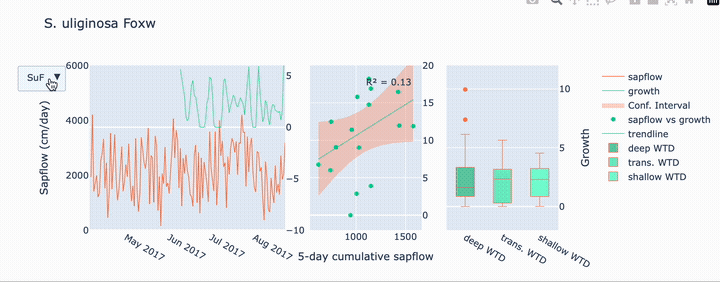

In [95]:
fig.write_html('temp_plotly_chart_Sp-DD.html')

<html>
 <head>
 </head>
 <body>
          <a id='5.'></a>
     <p style="color:blue;font-size:20px"> 5. Publish interactive chart at Datapane.com</p>
     <p><a href="https://docs.datapane.com/install-datapane/"  target="_blank">Reference</a> for Installation datapane library</p>
     <p>&emsp; - published interactive chart is available here at <a href="https://cloud.datapane.com/reports/E7o5E2A/interactive-chart-tree-physiology/"  target="_blank">Datapane.com</a></p>
     <br/>
 </body>
</html>

In [99]:
dp.upload_report(
    [
        dp.Plot(fig),
        dp.Text("Based on my paper published at https://doi.org/10.1016/j.agrformet.2023.109338")
    ],
    name="Interactive chart - Tree physiology"
)

Uploading report and associated data - *please wait...*

Report successfully uploaded - view and share at <a href='https://cloud.datapane.com/reports/E7o5E2A/interactive-chart-tree-physiology/' target='_blank'>here</a>.

Uploaded Report - view at https://cloud.datapane.com/reports/E7o5E2A/interactive-chart-tree-physiology/